Description

In [1]:
# Lenti Lines transfected with either plasmid or 
# measured at multiple dates post DPT 

## Import Functions and set directories ##

In [1]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
datadir = Path(Path('../../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/f_lentilines_noGate/'

In [2]:
display(datadir)

WindowsPath('C:/Users/ChemeGrad2020/OneDrive - Massachusetts Institute of Technology/Documents - GallowayLab')

## Import Data ##

In [9]:
#Check to make sure that datadir in "Set Directories" corresponds to the local path on your computer 

In [10]:
# Import Data 1
# Import the gated data 
folder = '20240504flow_lentilines_3DPT'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data1['bioreplicate'] = folder 


In [11]:
# Import Data 2
# Import the gated data 
folder = '20240507flow_lentilines_6DPT'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data2['bioreplicate'] = folder

In [12]:
# Import Data 3
# Import the gated data 
folder = '20240510flow_293T_lentiline_9DPT_real'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
#rd.plot.plot_well_metadata(yaml_path)
data3 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data3['bioreplicate'] = folder


### Concatenate Data, Gate on iRFP670, add conditions

In [13]:
data = pd.concat( [data1, data2, data3], ignore_index=True)
display(data.head())
#Also make the data without the DNA condition bc it did nothing (see the plots wihtout DPT listed) and the ignore reporter 
data = data[ data['reporter_ZF']!='ignore']
data = data[ data['Cre']!='DNA_0.1xCre']

,DPT,reporter_ZF,Cre,Cre_comarker,well,population,FSC-A,FSC-H,FSC-W,SSC-A,...,TagBFP-H,TagBFP-W,Janelia Fluor 549-A,Janelia Fluor 549-H,Janelia Fluor 549-W,mCherry-A,mCherry-H,mCherry-W,Time,bioreplicate
0,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,Single Cells,260052,204433,101,100832,...,69,0,111.0,102.0,3,-57,38,0,0.028893,20240504flow_lentilines_3DPT
1,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,Single Cells,514340,274730,120,297094,...,68,0,1122.0,781.0,61,274,211,26,0.142402,20240504flow_lentilines_3DPT
2,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,Single Cells,412530,240863,118,181328,...,82,0,1320.0,917.0,79,286,328,32,0.146530,20240504flow_lentilines_3DPT
3,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,Single Cells,297171,231936,94,94532,...,55,0,315.0,214.0,36,10,78,0,0.211540,20240504flow_lentilines_3DPT
4,3DPT,203bp-lenti_No-div_ZF37(lenti),noCre,none,A10,Single Cells,461135,256458,122,183754,...,82,0,1850.0,1392.0,65,531,348,42,0.249720,20240504flow_lentilines_3DPT


In [14]:
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['iRFP670-A'] >0]
#data['log10 mGL-A'] = np.log10(data['mGL-A'])

data['cond'] = data['reporter_ZF'] +'_' + data['Cre']

iRFP670_gate = 20000 
mGL_gate = 1500
mGL_gate_silencing = 250
mCherry_gate = 200
TagBFP_gate = 200

#Label for the mGL Gate 
data['mGL+'] = np.where( data['mGL-A']> mGL_gate_silencing, '+', '-')

rept_ZFs= pd.unique( data['reporter_ZF'])
display(rept_ZFs)

rept_shortname = { '203bp-lenti_No-div_ZF37(lenti)': '203bp-noDIV_37',
       '155bp-lenti_div-iRFP670_ZF37(lenti)': '155bp-DIV_37',
       '203bp-lenti_div-iRFP670_ZF37(lenti)': '203p-DIV_37',
       '203bp-lenti_div-iRFP670_ZF43(lenti)': '203bp-DIV_43',
}

DPT_short = { '3DPT': '3', '6DPT': '6', '9DPT':'9'}
data['DPT_short'] = data['DPT'].map(DPT_short)

Cres= pd.unique( data['Cre'])
display(Cres)

Cre_palette_ZF37 = {'noCre':'darksalmon', 'DNA_0.1xCre':'grey', 'modRNA_100ngxCre':'red'}
Cre_palette_ZF43 = {'noCre':'deepskyblue', 'DNA_0.1xCre':'grey', 'modRNA_100ngxCre':'blue'}


array(['203bp-lenti_No-div_ZF37(lenti)',
       '155bp-lenti_div-iRFP670_ZF37(lenti)',
       '203bp-lenti_div-iRFP670_ZF37(lenti)',
       '203bp-lenti_div-iRFP670_ZF43(lenti)'], dtype=object)

array(['noCre', 'modRNA_100ngxCre'], dtype=object)

## Histograms Ungated and Gated ##

**Ungated joint plots**

5000


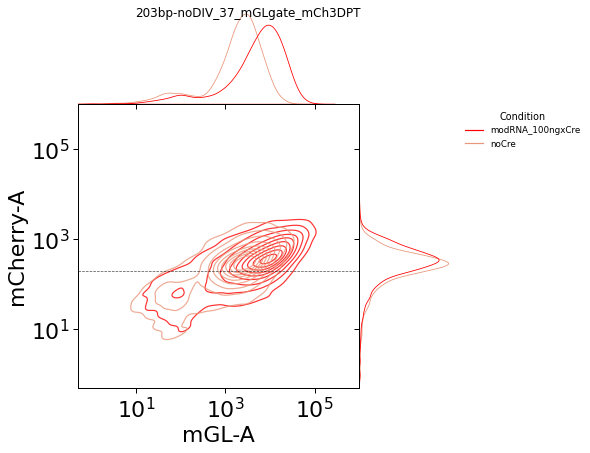

5000


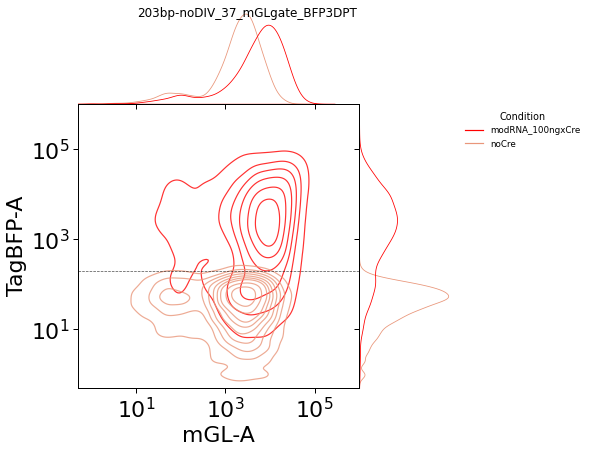

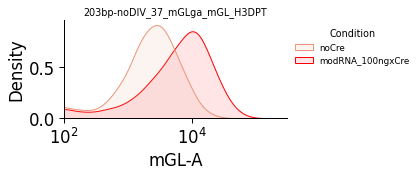

<Figure size 288x129.6 with 0 Axes>

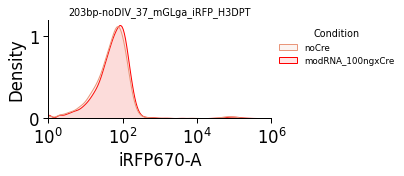

5000


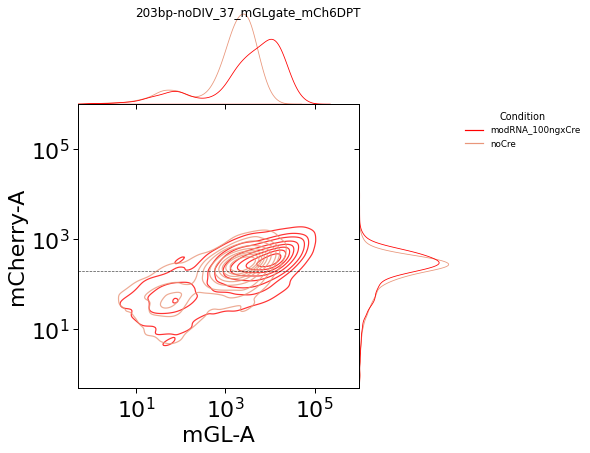

5000


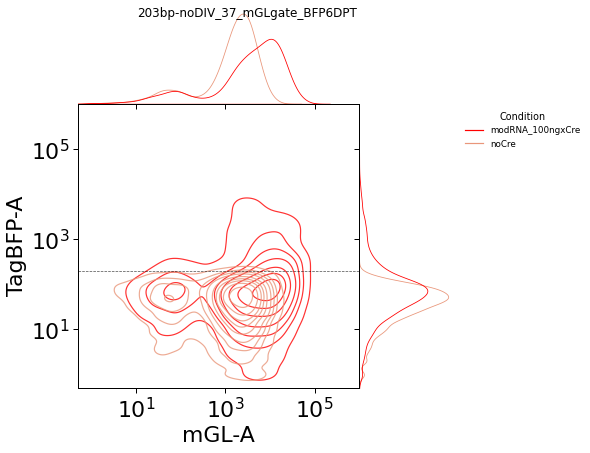

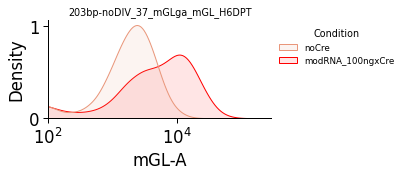

<Figure size 288x129.6 with 0 Axes>

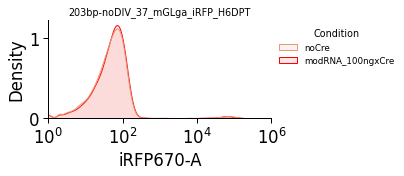

3641


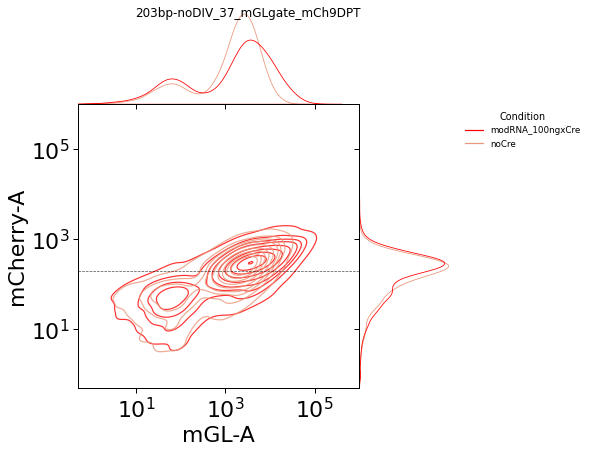

3641


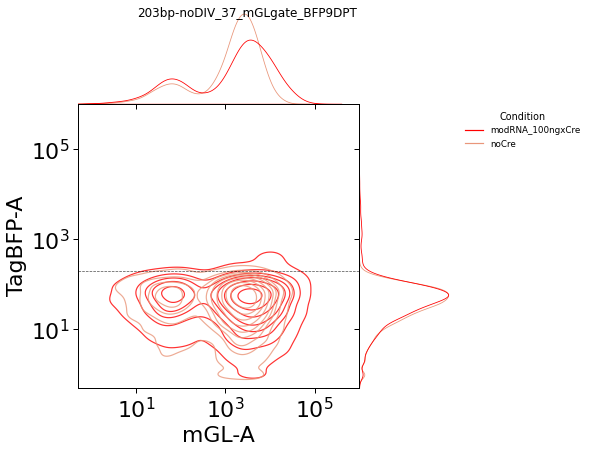

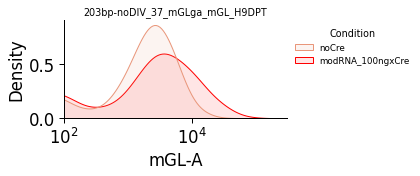

<Figure size 288x129.6 with 0 Axes>

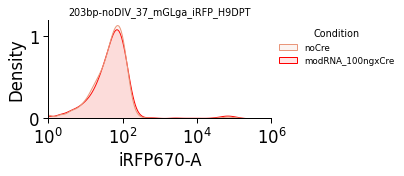

5000


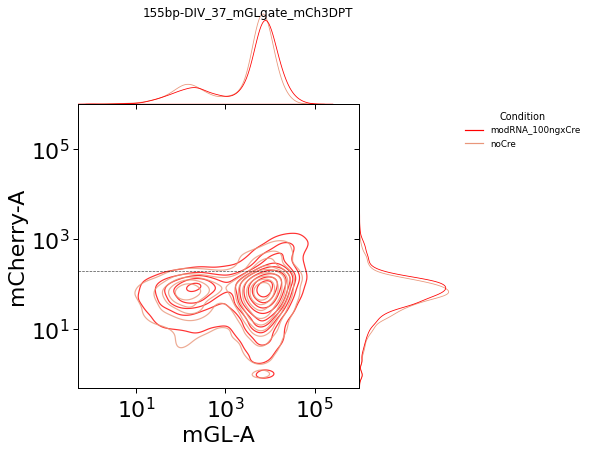

5000


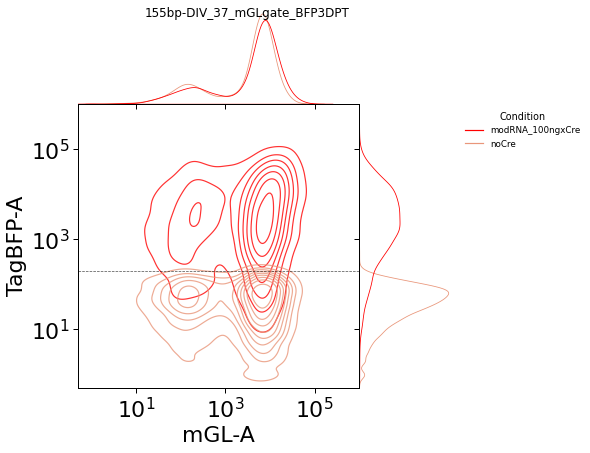

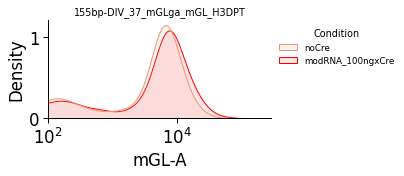

<Figure size 288x129.6 with 0 Axes>

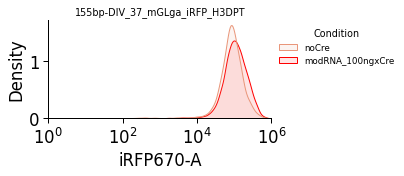

4644


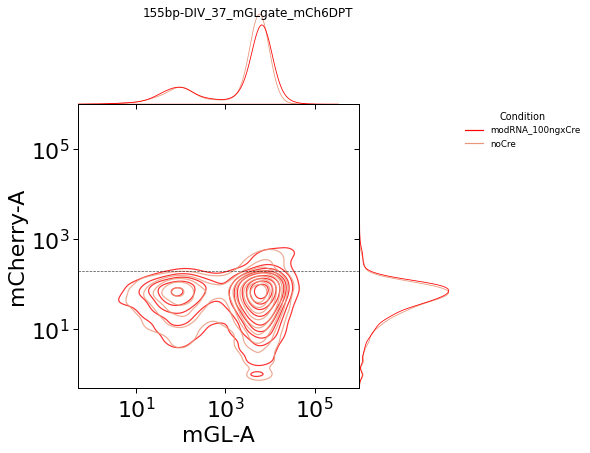

4644


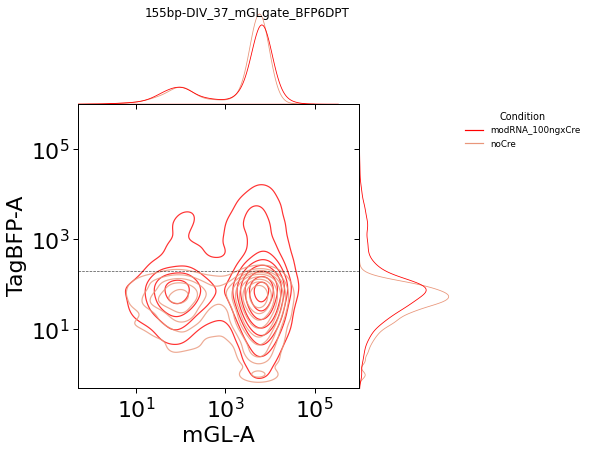

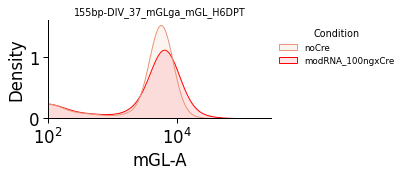

<Figure size 288x129.6 with 0 Axes>

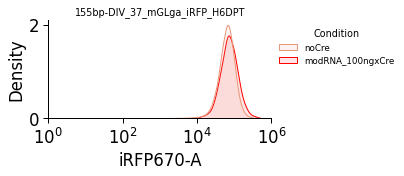

5000


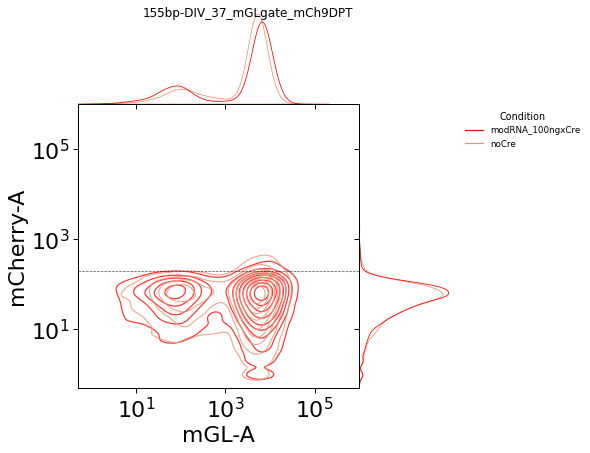

5000


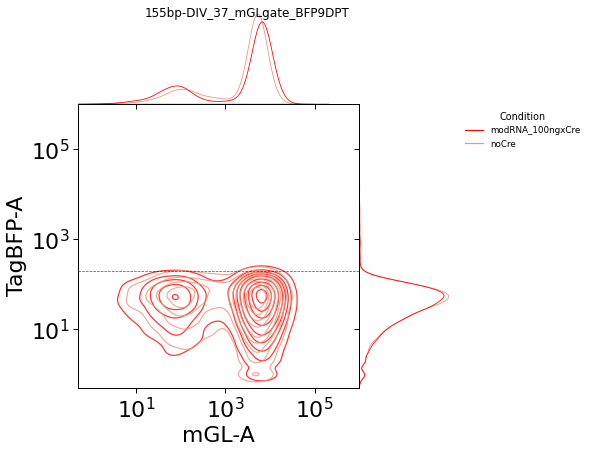

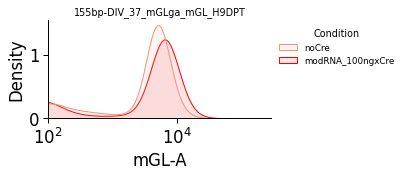

<Figure size 288x129.6 with 0 Axes>

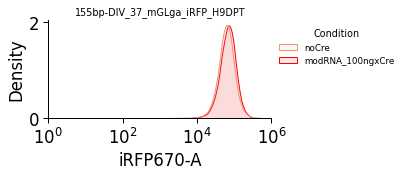

5000


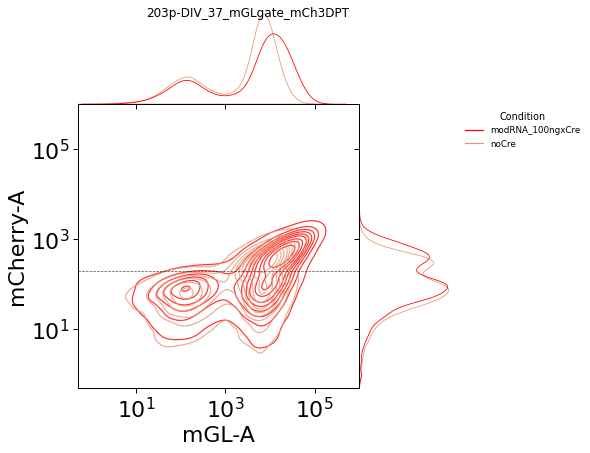

5000


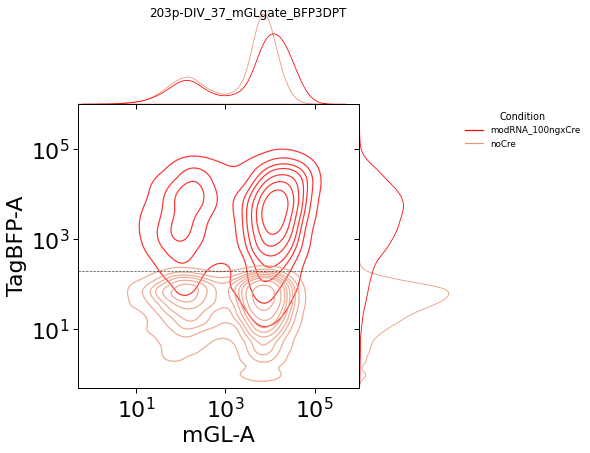

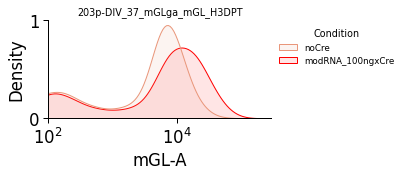

<Figure size 288x129.6 with 0 Axes>

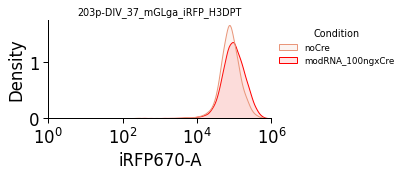

4758


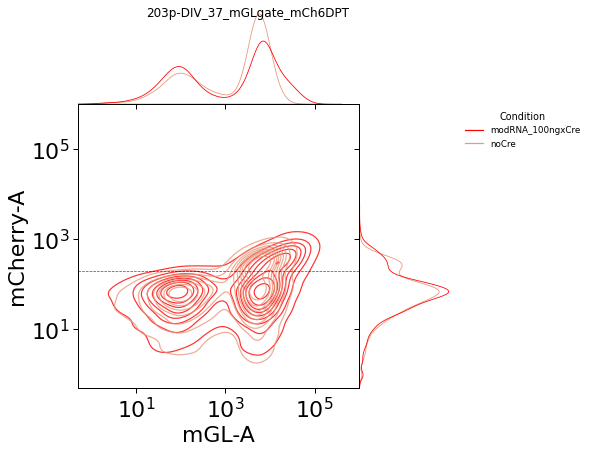

4758


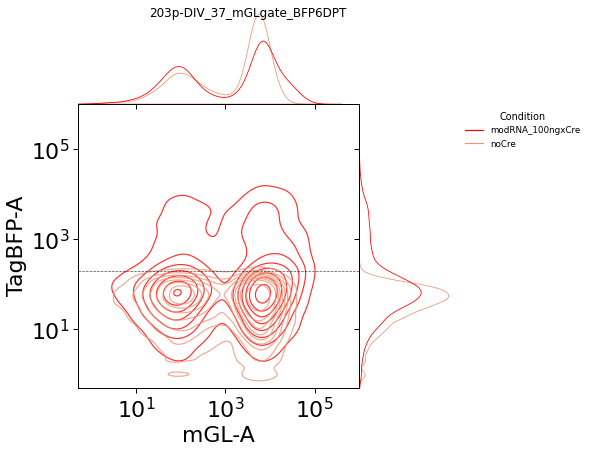

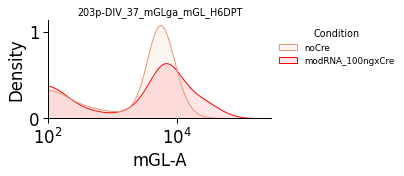

<Figure size 288x129.6 with 0 Axes>

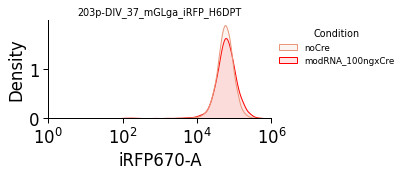

5000


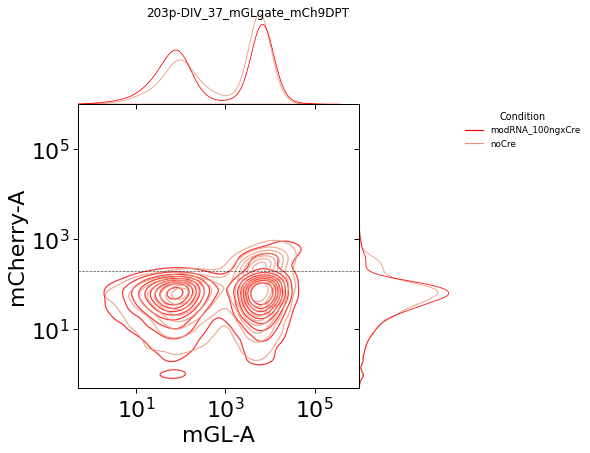

5000


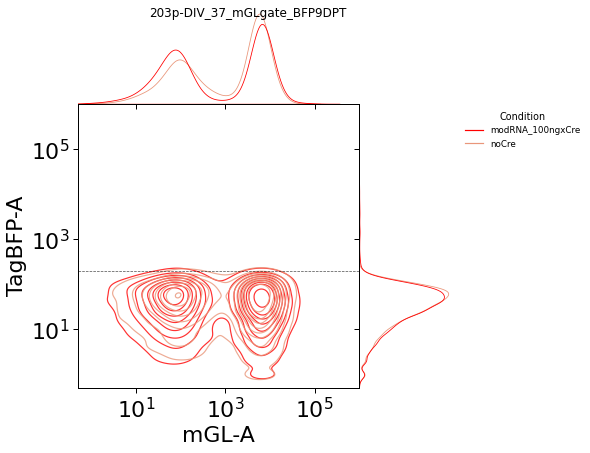

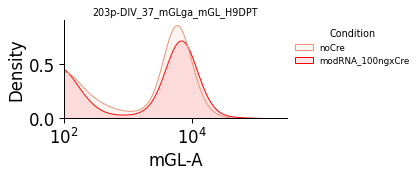

<Figure size 288x129.6 with 0 Axes>

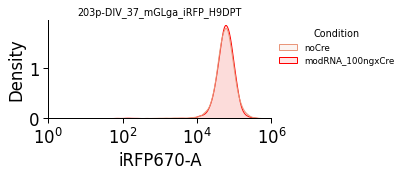

3266


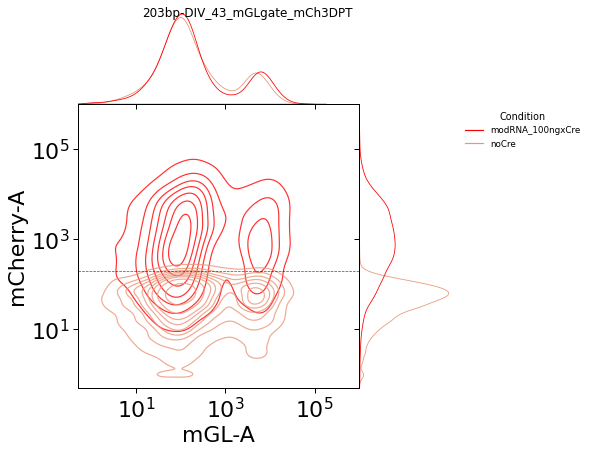

3266


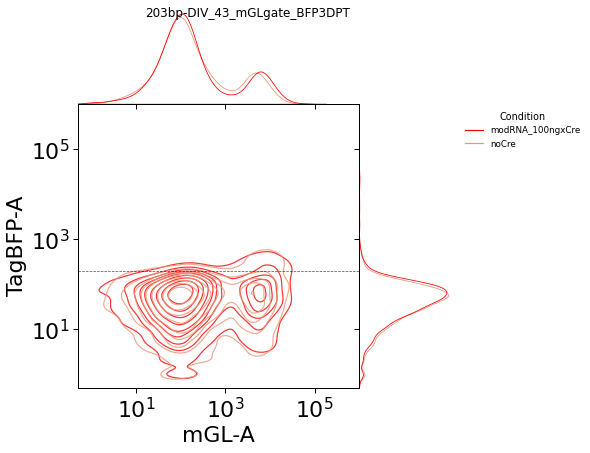

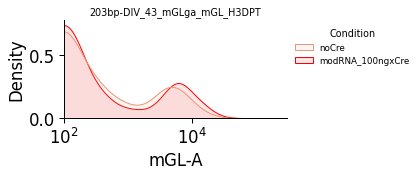

<Figure size 288x129.6 with 0 Axes>

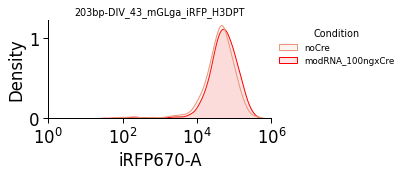

5000


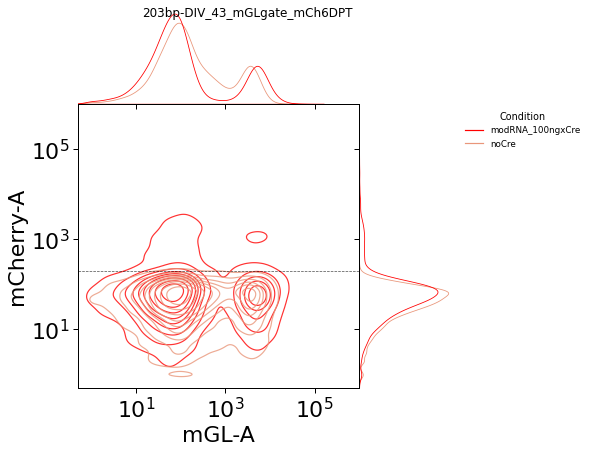

5000


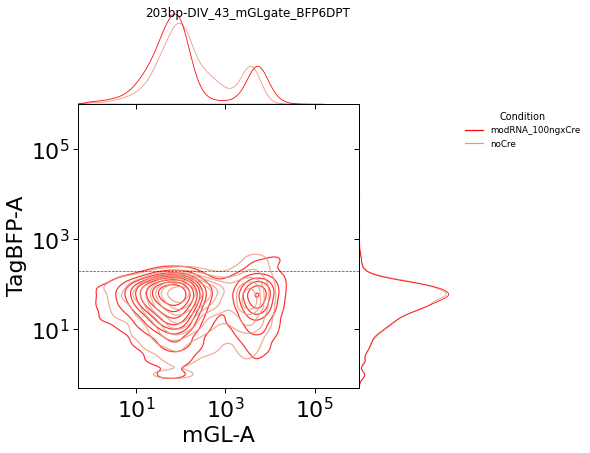

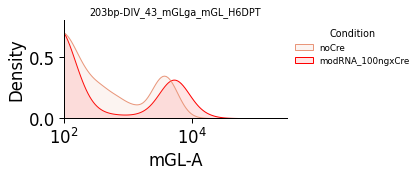

<Figure size 288x129.6 with 0 Axes>

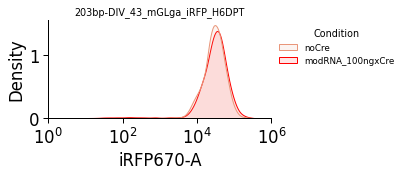

3052


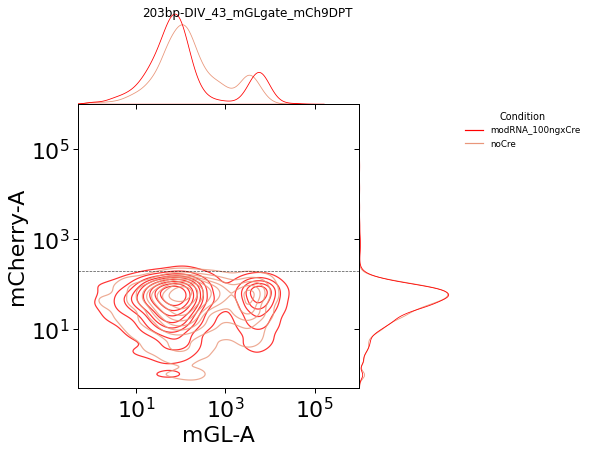

3052


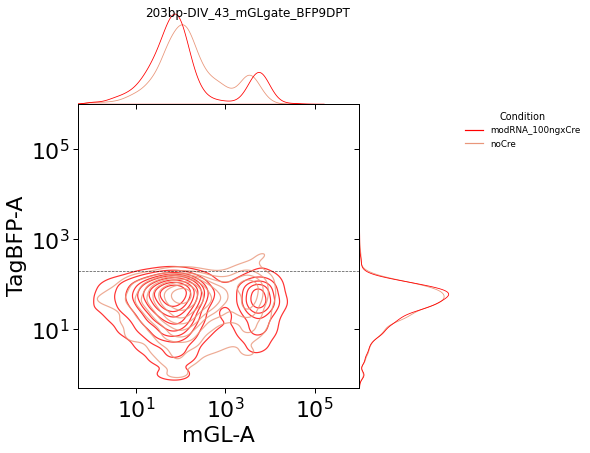

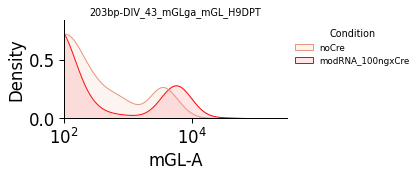

<Figure size 288x129.6 with 0 Axes>

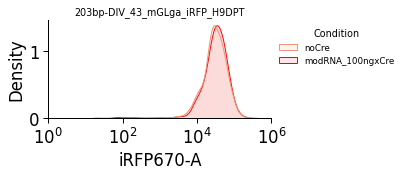

In [10]:
#set the hue, hue_order, palette 
hue = 'Cre'
hue_order = None
hueorder = None
palette = {'noCre': 'darksalmon', 'DNA_0.1xCre':'orange', 'modRNA_100ngxCre':'red'}

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1e2, 3e5]
parameters = pd.array(['mGL-A'])

## Ungated (whichever gate was on the original data)
#Iterate through the different conditions 
rept_ZFs= pd.unique( data['reporter_ZF'])
DPTs = pd.unique( data['DPT'])
for rept in rept_ZFs: 
    if rept != 'ignore':
        for DPT in DPTs:
            xlim = [1e2, 3e5]
            data_now = data[ data['reporter_ZF']== rept]
            data_now = data_now[ data_now['DPT']== DPT]
            
            plottitle = rept_shortname[rept] + '_mGLgate_mCh' + DPT
            g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                    plottitle=plottitle,
                                    palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            
            plottitle = rept_shortname[rept] + '_mGLgate_BFP' + DPT
            g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                    plottitle=plottitle, 
                                    palette=palette, alpha=0, type = ['contour'], hline=TagBFP_gate)
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

            plottitle = rept_shortname[rept] + '_mGLga_mGL_H' + DPT
            parameters = pd.array(['mGL-A'])
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, 
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            g = plt.figure( figsize=[xsize, ysize])
            
            xlim = [1e0, 1e6]
            plottitle = rept_shortname[rept] + '_mGLga_iRFP_H' + DPT
            parameters = pd.array(['iRFP670-A'])
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, 
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

### Histograms Gated mCherry

In [ ]:
# Import negative data
# Import the gated data 
folder = '20240510flow_293T_lentiline_9DPT_real'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'data_neg' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'data_neg.yaml' #Assign yaml paths 
data_neg = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data_neg = data_neg[ data_neg['mGL-A']>0]
#reference, same laser settings 

# Also available in
# folder = '20240510flow_293T_lentiline_3DPT'
# folder = '20240510flow_293T_lentiline_6DPT'

unstained should show


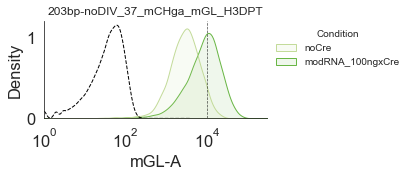

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


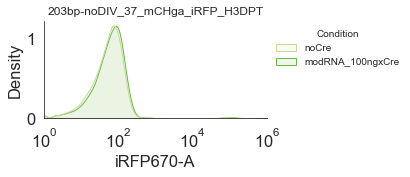

unstained should show


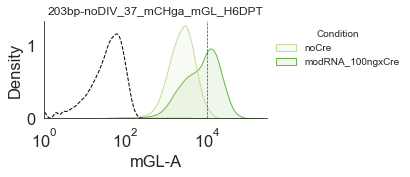

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


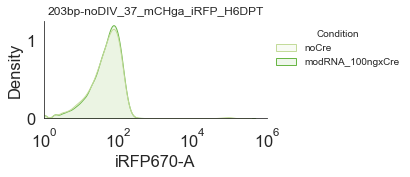

unstained should show


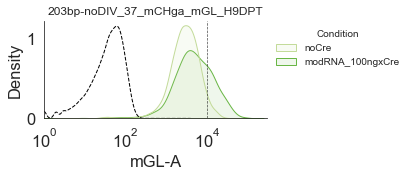

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


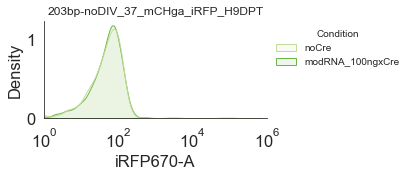

unstained should show


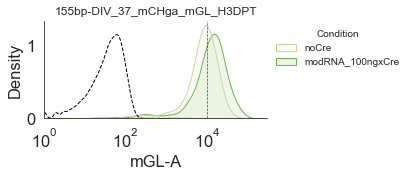

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


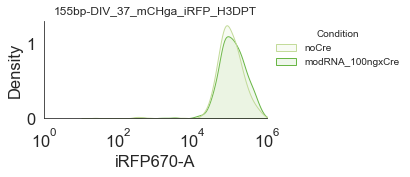

unstained should show


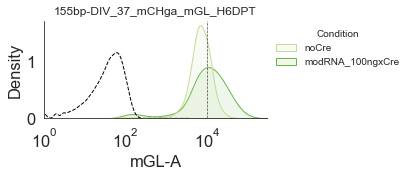

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


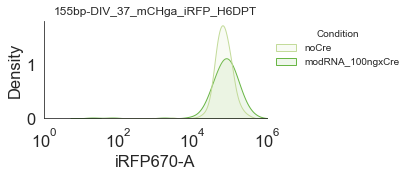

unstained should show


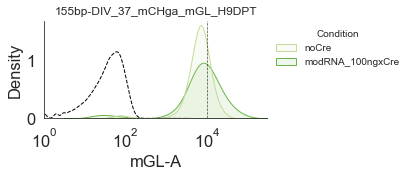

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


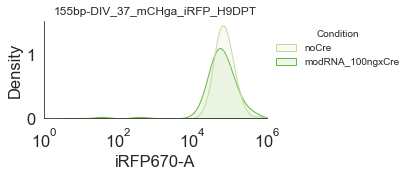

unstained should show


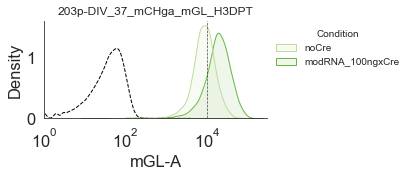

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


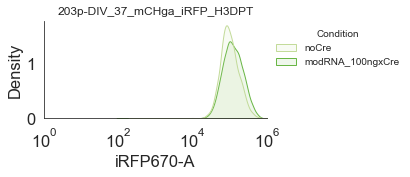

unstained should show


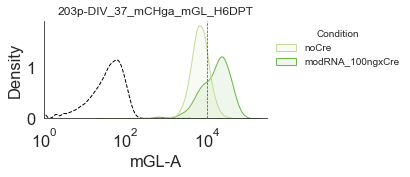

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


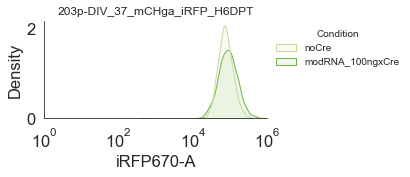

unstained should show


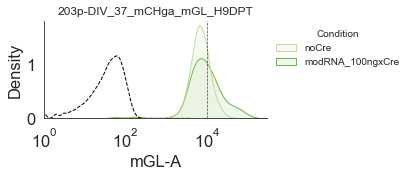

unstained should show


c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ChemeGrad2020\Dropbox (MIT)\MIT Graduate School\Galloway Lab\DIAL_git\newenv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


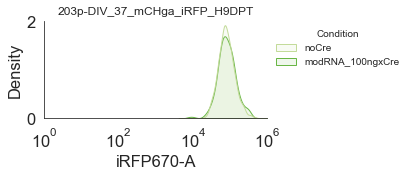

In [21]:
#set the hue, hue_order, palette 
hue = 'Cre' 
hue_order = None
hueorder = None
palette = {'noCre': '#C3DB9A', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#69B645'}

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1.5e1, 3e5]
parameters = pd.array(['mGL-A'])
DPTs = pd.unique( data['DPT'])

## Gated Mcherry 
#Iterate through the different conditions 
rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)',
       '155bp-lenti_div-iRFP670_ZF37(lenti)',
       '203bp-lenti_div-iRFP670_ZF37(lenti)'
       ], dtype=object)
# rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)'
#        ], dtype=object)

# %store -r data_unstained_20240304flow_exp20240301_p3_BioC_unstained
# data_neg = data_unstained_20240304flow_exp20240301_p3_BioC_unstained

for rept in rept_ZFs: 
    for DPT in DPTs:
        if rept != 'ignore':
            xlim = [1e2, 3e5]
            data_now = data[ data['reporter_ZF']== rept]
            data_now = data_now[ data_now['DPT']==DPT]

            hold = data_now
            # data_neg = hold[ hold['mCherry-A']<mCherry_gate]
            # data_neg = data_neg[data_neg['Cre']=='noCre']
            data_now = data_now[ data_now['mCherry-A']>mCherry_gate]
           
            
            # plottitle = rept_shortname[rept] + '_mCHgate_mCh' + DPT
            # g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
            #                         plottitle=plottitle, 
            #                         palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
            # g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            
            # plottitle = rept_shortname[rept] + '_mCHgate_BFP' + DPT
            # g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
            #                         plottitle=plottitle, 
            #                         palette=palette, alpha=0, type = ['contour'], hline=TagBFP_gate)
            # g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
            
            xlim = [1e0, 3e5]
            parameters = pd.array(['mGL-A'])
            plottitle = rept_shortname[rept] + '_mCHga_mGL_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize,
                                data_neg=data_neg, 
                                line=10000,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

            xlim = [1e0, 1e6]
            parameters = pd.array(['iRFP670-A'])
            plottitle = rept_shortname[rept] + '_mCHga_iRFP_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, data_neg=data_neg,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

### Histograms ungated 

unstained should show


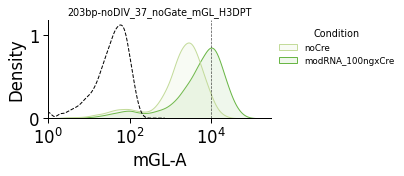

unstained should show


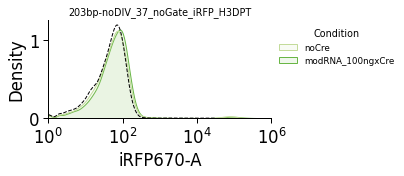

unstained should show


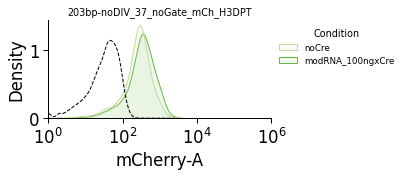

unstained should show


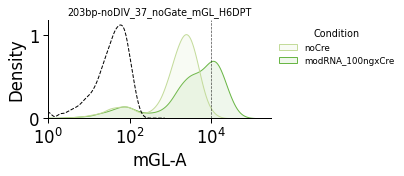

unstained should show


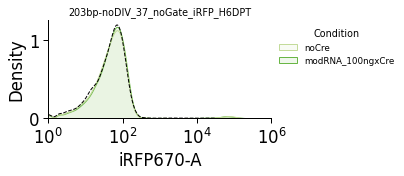

unstained should show


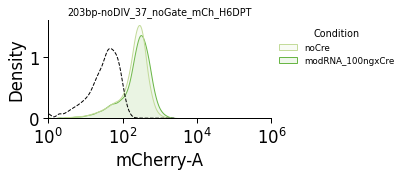

unstained should show


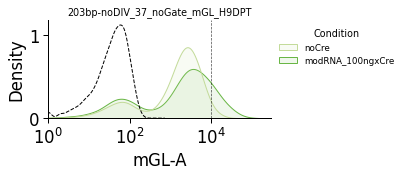

unstained should show


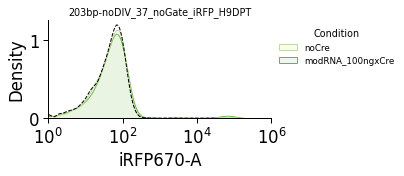

unstained should show


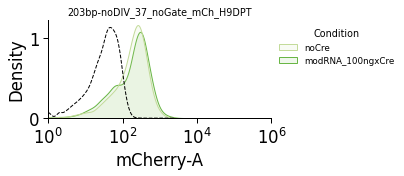

unstained should show


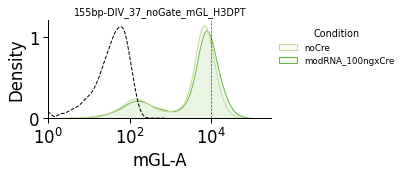

unstained should show


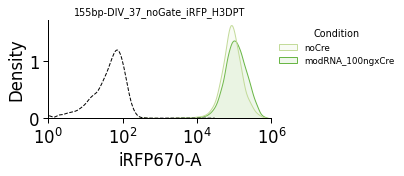

unstained should show


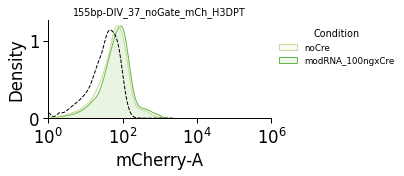

unstained should show


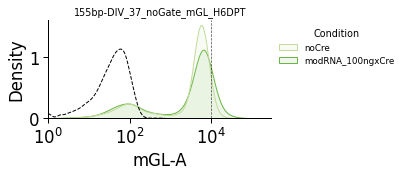

unstained should show


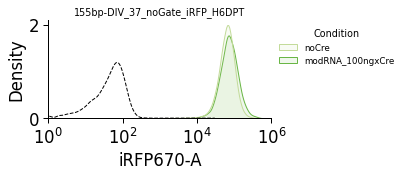

unstained should show


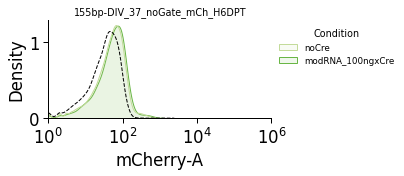

unstained should show


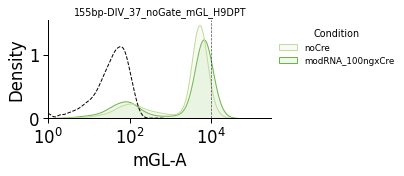

unstained should show


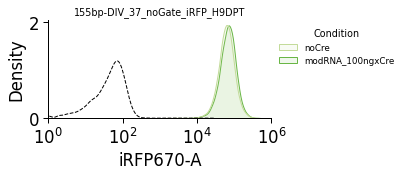

unstained should show


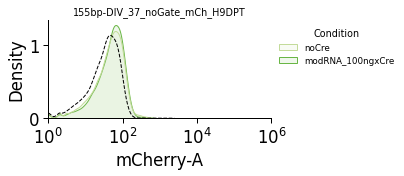

unstained should show


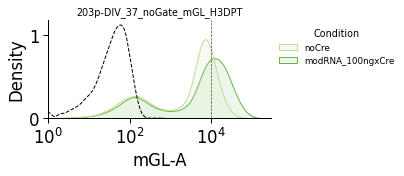

unstained should show


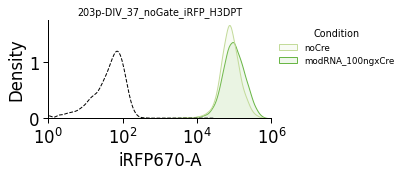

unstained should show


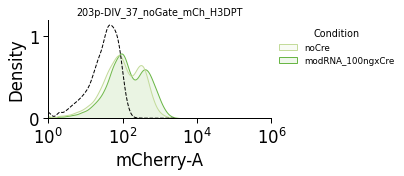

unstained should show


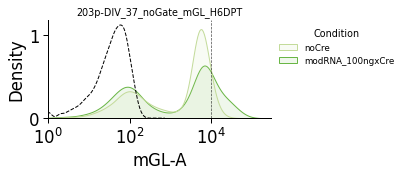

unstained should show


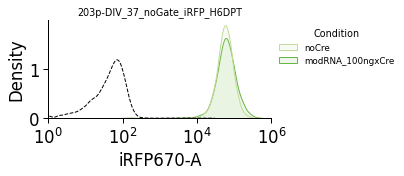

unstained should show


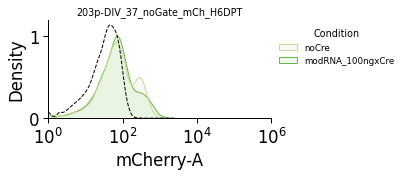

unstained should show


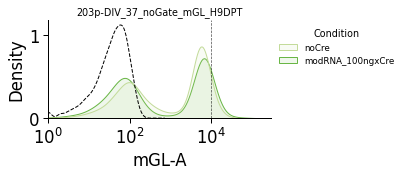

unstained should show


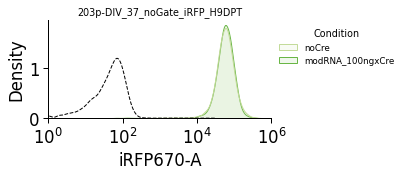

unstained should show


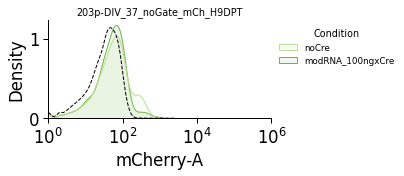

In [ ]:
#set the hue, hue_order, palette 
hue = 'Cre' 
hue_order = None
hueorder = None
palette = {'noCre': '#C3DB9A', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#69B645'}

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1.5e1, 3e5]
parameters = pd.array(['mGL-A'])
DPTs = pd.unique( data['DPT'])

## Gated Mcherry 
#Iterate through the different conditions 
rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)',
       '155bp-lenti_div-iRFP670_ZF37(lenti)',
       '203bp-lenti_div-iRFP670_ZF37(lenti)'
       ], dtype=object)
# rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)'
#        ], dtype=object)

# %store -r data_unstained_20240304flow_exp20240301_p3_BioC_unstained
# data_neg = data_unstained_20240304flow_exp20240301_p3_BioC_unstained

for rept in rept_ZFs: 
    for DPT in DPTs:
        if rept != 'ignore':
            
            
            xlim = [1e2, 3e5]
            data_now = data[ data['reporter_ZF']== rept]
            data_now = data_now[ data_now['DPT']==DPT]

            hold = data_now
            xlim = [1e0, 3e5]
            parameters = pd.array(['mGL-A'])
            plottitle = rept_shortname[rept] + '_noGate_mGL_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize,data_neg=data_neg, line=10000,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

            xlim = [1e0, 1e6]
            parameters = pd.array(['iRFP670-A'])
            plottitle = rept_shortname[rept] + '_noGate_iRFP_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, data_neg=data_neg,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

            xlim = [1e0, 1e6]
            parameters = pd.array(['mCherry-A'])
            plottitle = rept_shortname[rept] + '_noGate_mCh_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize, data_neg=data_neg,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

### Histograms ungated, mGL stacked

'203bp-lenti_No-div_ZF37(lenti)'

0
3DPT
unstained should show
1
6DPT
unstained should show
2
9DPT
unstained should show


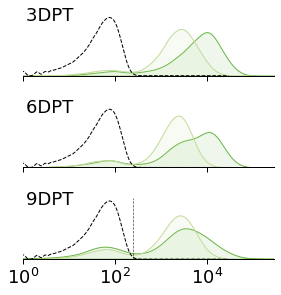

0
3DPT
unstained should show
1
6DPT
unstained should show
2
9DPT
unstained should show


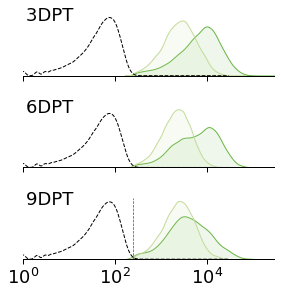

'155bp-lenti_div-iRFP670_ZF37(lenti)'

0
3DPT
unstained should show
1
6DPT
unstained should show
2
9DPT
unstained should show


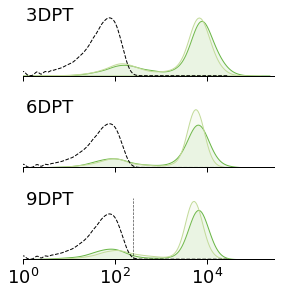

0
3DPT
unstained should show
1
6DPT
unstained should show
2
9DPT
unstained should show


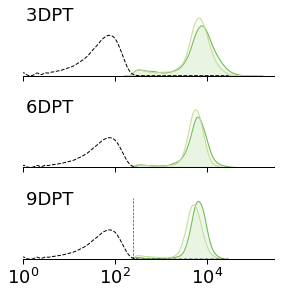

'203bp-lenti_div-iRFP670_ZF37(lenti)'

0
3DPT
unstained should show
1
6DPT
unstained should show
2
9DPT
unstained should show


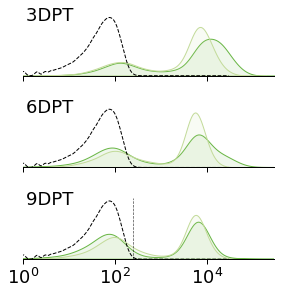

0
3DPT
unstained should show
1
6DPT
unstained should show
2
9DPT
unstained should show


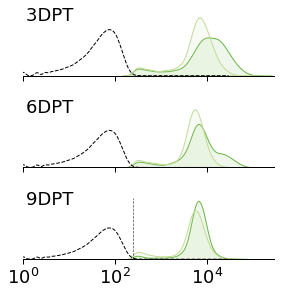

In [13]:
# List of conditions for different stacked plots
Cre_cond = pd.array(['noCre', 'modRNA_100ngxCre'] )

hue = 'Cre' 
hue_order = None
hueorder = None
palette = {'noCre': '#C3DB9A', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#69B645'}

# List of conditions for each row, dictionary
conditions = {}
DPTs = pd.unique( data['DPT'])
for DPT in DPTs:
    #print(prom)
    conditions[DPT] = 'DPT'
desired_order = [ '3DPT', '6DPT', '9DPT']
conditions = {key: conditions[key] for key in desired_order if key in conditions}

%store -r data_neg
data_neg = data_neg

for rept in rept_ZFs: 
    if rept != 'ignore':
        display(rept)
        xlim = [1e0, 3e5]
        data_now = data[ data['reporter_ZF']== rept]
        plottitle = ''
        h = custom_hist_plot_stacked( data_now, 
                            parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                            alpha=0.1, fontsize=18, data_neg= data_neg, conditions=conditions,
                            legendtitle='Condition',  xlim = xlim, xl = 'Output (mGL)', ysize = 1.5, xsize = 4.5, line=mGL_gate_silencing,
                            axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
        h = h.get_figure()
        plottitle = 'histogram stacked all.' + rept
        h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


        data_now = data[ (data['reporter_ZF']== rept) & (data['mGL-A']>250)]
        plottitle = ''
        h = custom_hist_plot_stacked( data_now, 
                            parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                            alpha=0.1, fontsize=18, data_neg= data_neg, conditions=conditions,
                            legendtitle='Condition',  xlim = xlim, xl = 'Output (mGL)', ysize = 1.5, xsize = 4.5, line=mGL_gate_silencing,
                            axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
        h = h.get_figure()
        plottitle = 'h_stackedGATe.' + rept
        h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')




### Gated tagBFP

374


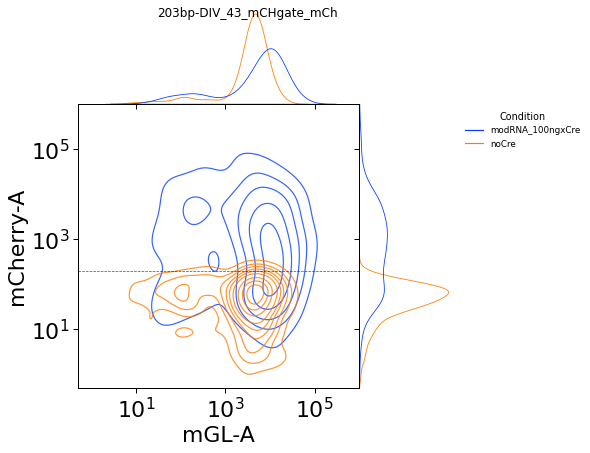

374


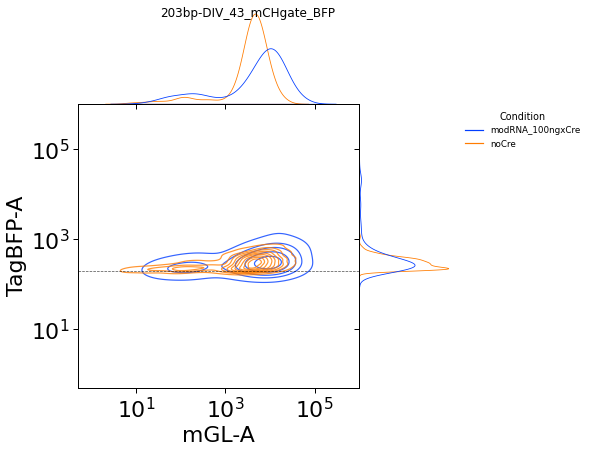

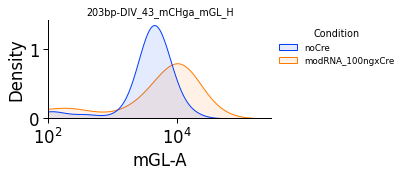

In [14]:
#set the hue, hue_order, palette 
hue = 'Cre' 
hue_order = None
hueorder = None
palette = 'bright'

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1e2, 3e5]
parameters = pd.array(['mGL-A'])


## Gated TagBFP
#Iterate through the different conditions 
rept_ZFs= pd.array(['203bp-lenti_div-iRFP670_ZF43(lenti)'], dtype=object)
for rept in rept_ZFs: 
    if rept != 'ignore':
        data_now = data[ data['reporter_ZF']== rept]
        data_now = data_now[ data_now['TagBFP-A']>TagBFP_gate]
        
        plottitle = rept_shortname[rept] + '_mCHgate_mCh'
        g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                plottitle=plottitle, 
                                palette=palette, alpha=0, type = ['contour'], hline=mCherry_gate)
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')
        
        plottitle = rept_shortname[rept] + '_mCHgate_BFP'
        g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue=hue, data=data_now, points = 5000, hue_order =hue_order, 
                                plottitle=plottitle, 
                                palette=palette, alpha=0, type = ['contour'], hline=TagBFP_gate)
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

        plottitle = rept_shortname[rept] + '_mCHga_mGL_H'
        g = plt.figure( figsize=[xsize, ysize])
        g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                            alpha=0.1,fontsize=fontsize,
                            legendtitle='Condition', xlim=xlim)
        g = g.get_figure()
        g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

### Histogram to show negative line

unstained should show


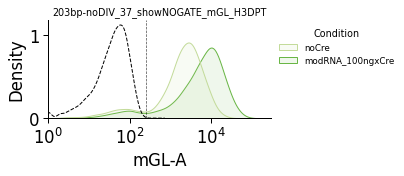

unstained should show


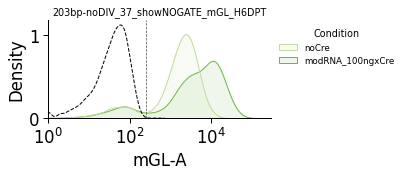

unstained should show


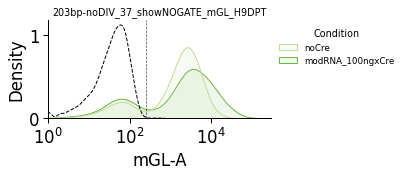

In [15]:
#set the hue, hue_order, palette 
hue = 'Cre' 
hue_order = None
hueorder = None
palette = {'noCre': '#C3DB9A', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#69B645'}

# Histogram conditions 
xsize = 4
ysize = 1.8
fontsize = 16.5
xlim = [1.5e1, 3e5]
parameters = pd.array(['mGL-A'])
DPTs = pd.unique( data['DPT'])

## Gated Mcherry 
#Iterate through the different conditions 
rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)',
       ], dtype=object)
# rept_ZFs= pd.array(['203bp-lenti_No-div_ZF37(lenti)'
#        ], dtype=object)

%store -r data_unstained_20240304flow_exp20240301_p3_BioC_unstained
data_neg = data_unstained_20240304flow_exp20240301_p3_BioC_unstained

for rept in rept_ZFs: 
    for DPT in DPTs:
        if rept != 'ignore':
            xlim = [1e2, 3e5]
            data_now = data[ data['reporter_ZF']== rept]
            data_now = data_now[ data_now['DPT']==DPT]

            hold = data_now
            xlim = [1e0, 3e5]
            parameters = pd.array(['mGL-A'])
            plottitle = rept_shortname[rept] + '_showNOGATE_mGL_H' + DPT
            g = plt.figure( figsize=[xsize, ysize])
            g = custom_hist_plot( data_now, parameters, hue=hue, palette=palette, hueorder=hueorder, xsize=xsize, ysize=ysize, title=plottitle, 
                                alpha=0.1,fontsize=fontsize,data_neg=data_neg, line=250,
                                legendtitle='Condition', xlim=xlim)
            g = g.get_figure()
            g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## Summary Plots ##

### Calculate Summary Stats**

In [ ]:
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['DPT', 'DPT_short', 'reporter_ZF', 'Cre', 'bioreplicate','well'] #how to filter results, columns -- 
#for lentilines each "well" labeled as such in the file was actually a separate passaging experiment and hence different bioreplicate
#well is just a remnant of data labeling, but it was biological replicate
x = ['mGL-A', 'TagBFP-A','mCherry-A','iRFP670-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate

#ungated
df = data #choose dataframe
s = calc_stats(df,by,x,stat) #calculate statistics 

#mCherry_gated
df = data[data['mCherry-A']>mCherry_gate] #choose dataframe
s_mCherry_gate = calc_stats(df,by,x,stat) #calculate statistics 

#for silencing calculation 
by = ['DPT', 'DPT_short', 'reporter_ZF', 'Cre', 'bioreplicate','well','mGL+']
df = data #choose dataframe
s_silencing = calc_stats(df,by,x,stat) #calculate statistics 

s_silencing.to_excel('Fig_S12D_S13F_fraction-expressing.xlsx',index=False)

In [12]:
display(pd.unique(data['bioreplicate']))

array(['20240504flow_lentilines_3DPT', '20240507flow_lentilines_6DPT',
       '20240510flow_293T_lentiline_9DPT_real'], dtype=object)

### Plot Summary Plots Ungated and mChGated**

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.962e-04 stat=-1.179e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=5.907e-05 stat=-1.776e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.297e-01 stat=-1.903e+00


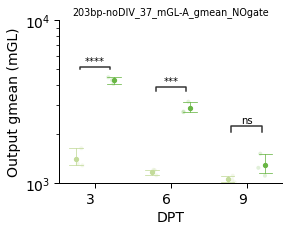

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.032e-04 stat=-1.542e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=3.620e-07 stat=-6.378e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=2.321e-03 stat=-6.894e+00


<Figure size 432x288 with 0 Axes>

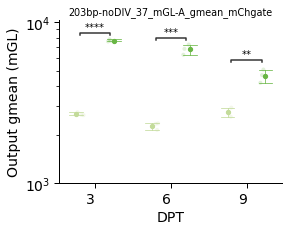

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.931e-03 stat=-6.475e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.656e-06 stat=-4.359e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=9.803e-03 stat=-4.631e+00


<Figure size 432x288 with 0 Axes>

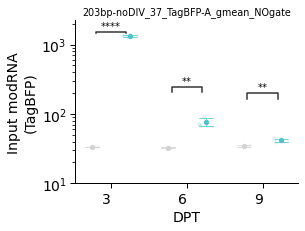

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=4.270e-03 stat=-5.846e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.147e-06 stat=-4.779e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=6.893e-02 stat=-2.470e+00


<Figure size 432x288 with 0 Axes>

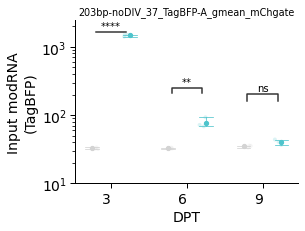

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.010e-03 stat=-6.429e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=3.225e-04 stat=-1.154e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=7.343e-01 stat=-3.640e-01


<Figure size 432x288 with 0 Axes>

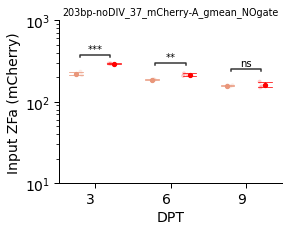

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.237e-04 stat=-1.152e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=6.296e-04 stat=-9.711e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.834e-02 stat=-3.042e+00


<Figure size 432x288 with 0 Axes>

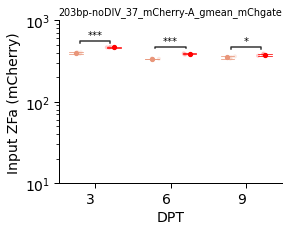

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=8.204e-01 stat=2.424e-01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=6.749e-04 stat=-9.538e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=6.514e-01 stat=4.876e-01


<Figure size 432x288 with 0 Axes>

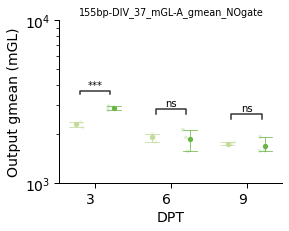

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=7.874e-02 stat=-2.347e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=8.467e-04 stat=-8.992e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.699e-01 stat=-1.009e+00


<Figure size 432x288 with 0 Axes>

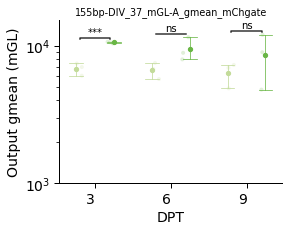

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.871e-04 stat=-1.188e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=6.333e-06 stat=-3.114e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=5.618e-01 stat=6.319e-01


<Figure size 432x288 with 0 Axes>

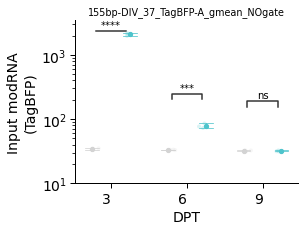

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.174e-03 stat=-6.338e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.456e-04 stat=-1.413e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=6.935e-02 stat=-2.465e+00


<Figure size 432x288 with 0 Axes>

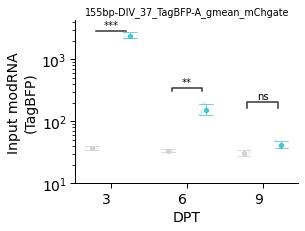

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.933e-02 stat=-3.016e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.258e-03 stat=-8.109e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.776e-02 stat=-3.885e+00


<Figure size 432x288 with 0 Axes>

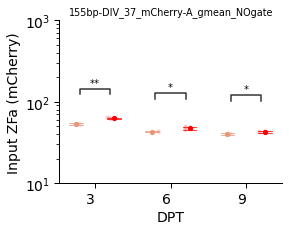

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=8.683e-02 stat=-2.258e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.998e-01 stat=-1.534e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.708e-01 stat=-1.667e+00


<Figure size 432x288 with 0 Axes>

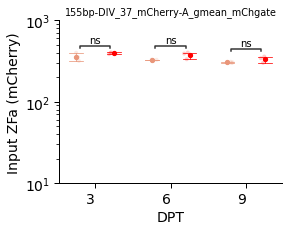

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=1.110e-01 stat=2.040e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=8.801e-06 stat=-2.868e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=2.329e-02 stat=3.574e+00


<Figure size 432x288 with 0 Axes>

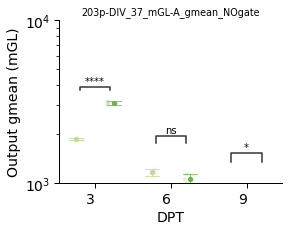

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=2.739e-04 stat=-1.203e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.332e-05 stat=-2.584e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=2.303e-02 stat=-3.587e+00


<Figure size 432x288 with 0 Axes>

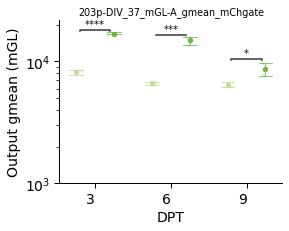

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=6.702e-06 stat=-3.071e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=3.163e-05 stat=-2.079e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.464e-01 stat=1.066e+00


<Figure size 432x288 with 0 Axes>

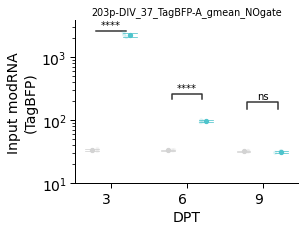

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=6.701e-05 stat=-1.720e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=2.717e-04 stat=-1.205e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.396e-01 stat=-1.083e+00


<Figure size 432x288 with 0 Axes>

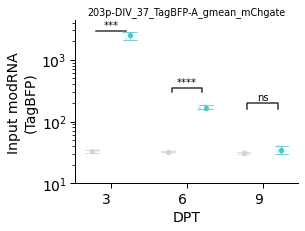

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=8.518e-01 stat=1.992e-01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=5.114e-05 stat=-1.842e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=7.266e-04 stat=9.357e+00


<Figure size 432x288 with 0 Axes>

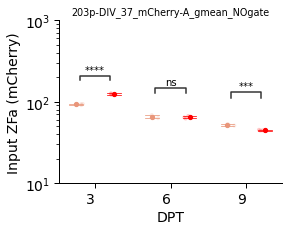

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.078e-04 stat=-1.167e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.104e-03 stat=-8.390e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.244e-02 stat=-4.321e+00


<Figure size 432x288 with 0 Axes>

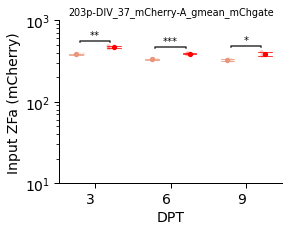

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=3.660e-03 stat=6.097e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=2.453e-02 stat=-3.516e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=2.385e-02 stat=3.548e+00


<Figure size 432x288 with 0 Axes>

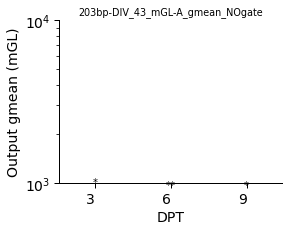

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=5.237e-01 stat=6.978e-01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.890e-01 stat=-1.581e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.516e-02 stat=3.664e+00


<Figure size 432x288 with 0 Axes>

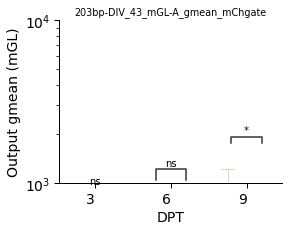

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=6.640e-01 stat=4.683e-01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.865e-03 stat=-7.307e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.887e-01 stat=-9.661e-01


<Figure size 432x288 with 0 Axes>

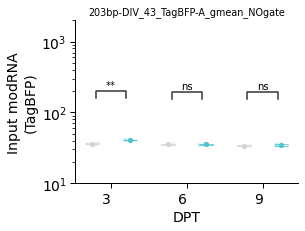

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=4.366e-01 stat=8.634e-01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=3.183e-02 stat=3.235e+00
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.691e-01 stat=-1.054e+00


<Figure size 432x288 with 0 Axes>

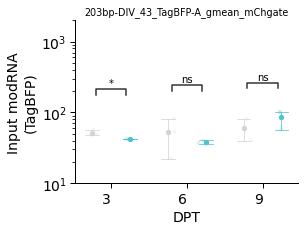

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=5.627e-04 stat=-9.997e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.499e-04 stat=-1.403e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=3.225e-01 stat=-1.128e+00


<Figure size 432x288 with 0 Axes>

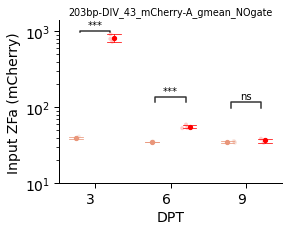

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

6_noCre v.s. 6_modRNA_100ngxCre: t-test independent samples, P_val=7.931e-04 stat=-9.146e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.772e-04 stat=-1.344e+01
9_noCre v.s. 9_modRNA_100ngxCre: t-test independent samples, P_val=1.349e-01 stat=-2.033e+00


<Figure size 432x288 with 0 Axes>

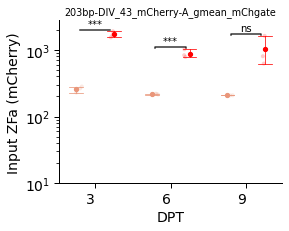

<Figure size 432x288 with 0 Axes>

In [17]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data['reporter_ZF'])
hue = 'Cre' 
hue_order = pd.array(['noCre','modRNA_100ngxCre'])
palette_mGL = {'noCre': '#C3DB9A', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#69B645'}
palette_mCherry = {'noCre': 'darksalmon', 
               'DNA_0.1xCre':'orange', 
               'modRNA_100ngxCre':'red'}
palette_tagBFP_Cre = { 'noCre': 'lightgray', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#4EC4CC'}

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_tagBFP_Cre, 
        'mCherry-A_gmean': palette_mCherry}

x = 'DPT_short'
xlabel = 'DPT'
order = pd.array(['3', '6','9']) 

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean','TagBFP-A_gmean','mCherry-A_gmean'])
#set plotting parameters 
yscale= 'log'
ylims = { 'mGL-A_gmean': [1e3, 1e4],
        'TagBFP-A_gmean':  [1e1, 2e3], 
        'mCherry-A_gmean': [1e1, 1e3]}

ylabels = { 'mGL-A_gmean': 'Output gmean (mGL)',
        'TagBFP-A_gmean':  'Input modRNA\n(TagBFP)', 
        'mCherry-A_gmean': 'Input ZFa (mCherry)'}


#Set p-value significance comparisons 
pairs = [ [('3','noCre'), ('3','modRNA_100ngxCre')],
         [('6','noCre'), ('6','modRNA_100ngxCre')],
         [('9','noCre'), ('9','modRNA_100ngxCre')],
         #[('3DPT','noCre'), ('6DPT','noCre')],
         #[('6DPT','noCre'), ('9DPT','noCre')],
         #[('3DPT','modRNA_100ngxCre'), ('6DPT','modRNA_100ngxCre')],
         #[('6DPT','modRNA_100ngxCre'), ('9DPT','modRNA_100ngxCre')]
]

xsize =4  ; ysize = 3
fontsize = 14

for rept in rept_ZFs:
       for stat in stats_plot:
              y = stat # set the stat to plot
              palette = palettes[stat]
              yscale = 'log'
              ylabel = ylabels[stat]
              ylim = ylims[stat]
              data_now = s[s['reporter_ZF']==rept]
              plottitle = rept_shortname[rept]+ '_' + y + '_NOgate'
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                            xlabel=xlabel)
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

              data_now = s_mCherry_gate[s_mCherry_gate['reporter_ZF']==rept]
              plottitle = rept_shortname[rept]+ '_' + y + '_mChgate'
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                            xlabel=xlabel)
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

### Plot fraction silenced over time

In [11]:
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['DPT_short', 'reporter_ZF', 'Cre', 'mGL+'] #how to filter results, columns 
x = ['Fraction'] #which parameter to calculate results on
stat = [np.mean] #statistics to calculate
df = s_silencing #choose dataframe
s_mean_silencing = calc_stats(df,by,x,stat) #calculate statistics
s_mean_silencing[ 'fraction neg'] = 1-s_mean_silencing['Fraction_mean']
display( s_mean_silencing[(s_mean_silencing['mGL+']=='+')])

,DPT_short,reporter_ZF,Cre,mGL+,Fraction_mean,Fraction,Count,fraction neg
0,3,155bp-lenti_div-iRFP670_ZF37(lenti),modRNA_100ngxCre,+,0.832114,0.5,3,0.167886
2,3,155bp-lenti_div-iRFP670_ZF37(lenti),noCre,+,0.808333,0.5,3,0.191667
4,3,203bp-lenti_No-div_ZF37(lenti),modRNA_100ngxCre,+,0.911818,0.5,3,0.088182
6,3,203bp-lenti_No-div_ZF37(lenti),noCre,+,0.856989,0.5,3,0.143011
8,3,203bp-lenti_div-iRFP670_ZF37(lenti),modRNA_100ngxCre,+,0.785363,0.5,3,0.214637
10,3,203bp-lenti_div-iRFP670_ZF37(lenti),noCre,+,0.757838,0.5,3,0.242162
12,3,203bp-lenti_div-iRFP670_ZF43(lenti),modRNA_100ngxCre,+,0.320599,0.5,3,0.679401
14,3,203bp-lenti_div-iRFP670_ZF43(lenti),noCre,+,0.337119,0.5,3,0.662881
16,6,155bp-lenti_div-iRFP670_ZF37(lenti),modRNA_100ngxCre,+,0.766099,0.5,3,0.233901
18,6,155bp-lenti_div-iRFP670_ZF37(lenti),noCre,+,0.788219,0.5,3,0.211781


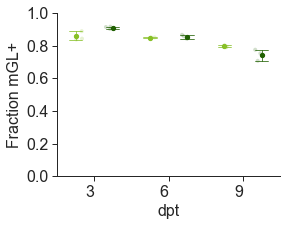

<Figure size 432x288 with 0 Axes>

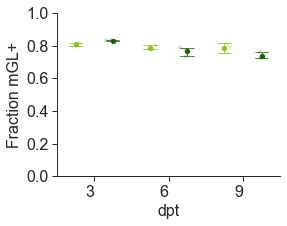

<Figure size 432x288 with 0 Axes>

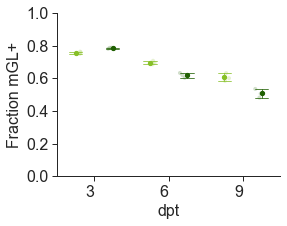

<Figure size 432x288 with 0 Axes>

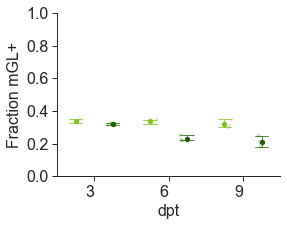

<Figure size 432x288 with 0 Axes>

In [16]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data['reporter_ZF'])
hue = 'Cre' 
hue_order = pd.array(['noCre','modRNA_100ngxCre'])
palette_mGL = {'noCre':"#87C027",       #'#C3DB9A', 
               'DNA_0.1xCre':'red', 
               'modRNA_100ngxCre': "#206002"}   # '#69B645'}
palette_mCherry = {'noCre': 'darksalmon', 
               'DNA_0.1xCre':'orange', 
               'modRNA_100ngxCre':'red'}
palette_tagBFP_Cre = { 'noCre': 'lightgray', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#4EC4CC'}

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_tagBFP_Cre, 
        'mCherry-A_gmean': palette_mCherry, 
        'Fraction': palette_mGL}

x = 'DPT_short'
xlabel = 'DPT'
order = pd.array(['3', '6','9']) 

#List of stats to plot 
stats_plot = pd.array( ['Fraction'])
#set plotting parameters 
yscale= 'linear'
ylims = { 'Fraction': [0,1]}

ylabels = { 'Fraction': 'Fraction mGL+'}


#Set p-value significance comparisons 
pairs = [ #[('3','noCre'), ('3','modRNA_100ngxCre')],
         #[('6','noCre'), ('6','modRNA_100ngxCre')],
         #[('9','noCre'), ('9','modRNA_100ngxCre')],
         #[('3DPT','noCre'), ('6DPT','noCre')],
         #[('6DPT','noCre'), ('9DPT','noCre')],
         #[('3DPT','modRNA_100ngxCre'), ('6DPT','modRNA_100ngxCre')],
         #[('6DPT','modRNA_100ngxCre'), ('9DPT','modRNA_100ngxCre')]
]

xsize =4  ; ysize = 3
fontsize = 16

for rept in rept_ZFs:
       for stat in stats_plot:
              y = stat # set the stat to plot
              palette = palettes[stat]
              ylabel = ylabels[stat]
              ylim = ylims[stat]
              data_now = s_silencing[s_silencing['reporter_ZF']==rept]
              data_now = data_now[ data_now['mGL+']=='+']

              plottitle = rept_shortname[rept]+ '_' + y + '_NOgate'
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle='', 
                            xlabel='dpt')
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')




### Plot number of cells silenced or not

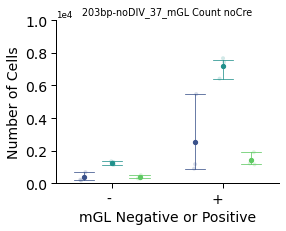

<Figure size 432x288 with 0 Axes>

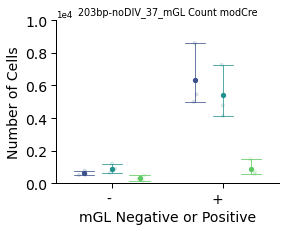

<Figure size 432x288 with 0 Axes>

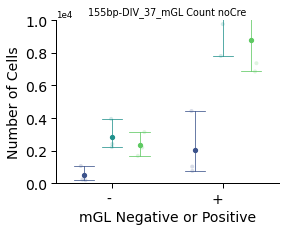

<Figure size 432x288 with 0 Axes>

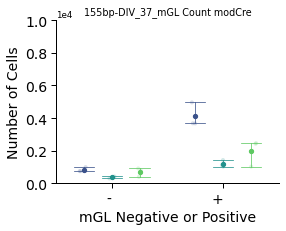

<Figure size 432x288 with 0 Axes>

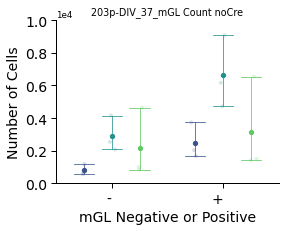

<Figure size 432x288 with 0 Axes>

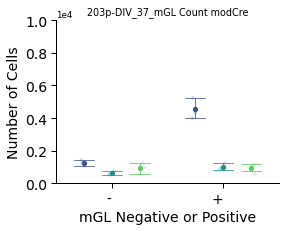

<Figure size 432x288 with 0 Axes>

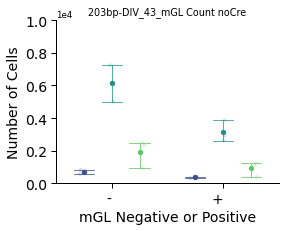

<Figure size 432x288 with 0 Axes>

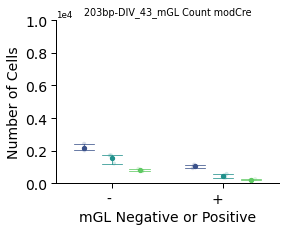

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data['reporter_ZF'])
hue = 'DPT' 
hue_order = pd.array(['3DPT', '6DPT', '9DPT'])
palette_mGL = {'noCre':"#87C027",       #'#C3DB9A', 
               'DNA_0.1xCre':'red', 
               'modRNA_100ngxCre': "#206002"}   # '#69B645'}

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_tagBFP_Cre, 
        'mCherry-A_gmean': palette_mCherry, 
        'Fraction': palette_mGL, 
        'Count': 'viridis'}

x = 'mGL+'
xlabel = 'mGL Negative or Positive'
order = pd.array(['-','+']) 

#List of stats to plot 
stats_plot = pd.array( ['Count'])
#set plotting parameters 
yscale= 'linear'
ylims = { 'Count': [0,1e4]}

ylabels = { 'Count': 'Number of Cells'}


#Set p-value significance comparisons 
pairs = [ ]

xsize =4  ; ysize = 3
fontsize = 14

for rept in rept_ZFs:
       for stat in stats_plot:
              y = stat # set the stat to plot
              palette = palettes[stat]
              ylabel = ylabels[stat]
              ylim = ylims[stat]
              data_now_rept = s_silencing[s_silencing['reporter_ZF']==rept]
              
              data_now = data_now_rept[data_now_rept['Cre']=='noCre']
              plottitle = rept_shortname[rept]+ '_' + 'mGL Count noCre'
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                            xlabel=xlabel)
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

              data_now = data_now_rept[data_now_rept['Cre']=='modRNA_100ngxCre']
              plottitle = rept_shortname[rept]+ '_' + 'mGL Count modCre'
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                            xlabel=xlabel)
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## Fold Change Calculation - mCherry gated

In [20]:
# Summary stats calculation from earlier in the code

# #Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
# by = ['DPT', 'DPT_short', 'reporter_ZF', 'Cre', 'bioreplicate','well'] #how to filter results, columns 
# x = ['mGL-A', 'TagBFP-A','mCherry-A','iRFP670-A'] #which parameter to calculate results on
# stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate

# #ungated
# df = data #choose dataframe
# s = calc_stats(df,by,x,stat) #calculate statistics 

# #mCherry_gated
# df = data[data['mCherry-A']>mCherry_gate] #choose dataframe
# s_mCherry_gate = calc_stats(df,by,x,stat) #calculate statistics 

In [21]:
s_mCherry_gate['DPT_biorep_well'] = s_mCherry_gate['DPT'] + s_mCherry_gate['reporter_ZF'] + s_mCherry_gate['bioreplicate'] 
 
s_mCherry_gate_foldchange = s_mCherry_gate[ s_mCherry_gate['reporter_ZF']!= '203bp-lenti_div-iRFP670_ZF43(lenti)' ]
conds = pd.unique( s_mCherry_gate_foldchange['DPT_biorep_well'])

s_noCre_map  = {'test':'test'}

for cond in conds:
    display(cond)
    data_now = s_mCherry_gate[ s_mCherry_gate['DPT_biorep_well'] == cond]
    #display(data_now) 
    mGL_noCre = data_now[ data_now['Cre'] == 'noCre']['mGL-A_gmean'].iloc[0]
    s_noCre_map[cond] = mGL_noCre

s_mCherry_gate['noCre'] = s_mCherry_gate['DPT_biorep_well'].map(s_noCre_map)
s_mCherry_gate['Fold Change'] = s_mCherry_gate['mGL-A_gmean'] / s_mCherry_gate['noCre']


'3DPT155bp-lenti_div-iRFP670_ZF37(lenti)20240504flow_lentilines_3DPT'

'3DPT203bp-lenti_No-div_ZF37(lenti)20240504flow_lentilines_3DPT'

'3DPT203bp-lenti_div-iRFP670_ZF37(lenti)20240504flow_lentilines_3DPT'

'6DPT155bp-lenti_div-iRFP670_ZF37(lenti)20240507flow_lentilines_6DPT'

'6DPT203bp-lenti_No-div_ZF37(lenti)20240507flow_lentilines_6DPT'

'6DPT203bp-lenti_div-iRFP670_ZF37(lenti)20240507flow_lentilines_6DPT'

'9DPT155bp-lenti_div-iRFP670_ZF37(lenti)20240510flow_293T_lentiline_9DPT_real'

'9DPT203bp-lenti_No-div_ZF37(lenti)20240510flow_293T_lentiline_9DPT_real'

'9DPT203bp-lenti_div-iRFP670_ZF37(lenti)20240510flow_293T_lentiline_9DPT_real'

## Plot Fold Change

In [1]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data['reporter_ZF'])
hue = 'Cre' 
hue_order = pd.array(['noCre','modRNA_100ngxCre'])
# palette_mGL = {'noCre': '#C3DB9A', 
#                'DNA_0.1xCre':'gray', 
#                'modRNA_100ngxCre':'#69B645'}
# palette_mCherry = {'noCre': 'darksalmon', 
#                'DNA_0.1xCre':'orange', 
#                'modRNA_100ngxCre':'red'}
# palette_tagBFP_Cre = { 'noCre': 'lightgray', 
#                'DNA_0.1xCre':'gray', 
#                'modRNA_100ngxCre':'#4EC4CC'}

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_tagBFP_Cre, 
        'mCherry-A_gmean': palette_mCherry, 
        'Fold Change': palette_mGL}

x = 'DPT_short'
xlabel = 'DPT'
order = pd.array(['3', '6','9']) 

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean','TagBFP-A_gmean','mCherry-A_gmean'])
#set plotting parameters 
yscale= 'linear'
ylims = { 'mGL-A_gmean': [1e3, 1e4],
        'TagBFP-A_gmean':  [1e1, 2e3], 
        'mCherry-A_gmean': [1e1, 1e3], 
        'Fold Change': [0,4]}


#Set p-value significance comparisons 
pairs = [
]

xsize =4  ; ysize = 3
fontsize = 14

y = 'Fold Change'
for rept in rept_ZFs:
    data_now = s_mCherry_gate[s_mCherry_gate['reporter_ZF']==rept]
    plottitle = rept_shortname[rept]+ '_' + y + '_mChgate'
    palette = palettes[y]
    ylim = ylims[y]
    g = plt.figure(figsize=(xsize,ysize))
    plt.axhline(y=1, ls='--', color='#C3DB9A')
    g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                ylim=ylim, fontsize=fontsize, 
                x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle=plottitle, 
                xlabel=xlabel, scientific=False)
    g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

NameError: name 'pd' is not defined

# Fraction mGL>10000

In [23]:
# Count the total number of cells in each 'cond' and 'DPT' group
by = ['reporter_ZF', 'Cre','DPT']

total_counts = df.groupby(by).size()

# Count the number of cells with 'mGL-A' > 10000 in each 'cond' and 'DPT' group
counts_above_10000 = df[df['mGL-A'] > 10000].groupby(by).size()

# Calculate the fraction
fraction = (counts_above_10000 / total_counts).fillna(0).reset_index(name='fraction')

display(fraction)

,reporter_ZF,Cre,DPT,fraction
0,155bp-lenti_div-iRFP670_ZF37(lenti),modRNA_100ngxCre,3DPT,0.250913
1,155bp-lenti_div-iRFP670_ZF37(lenti),modRNA_100ngxCre,6DPT,0.102283
2,155bp-lenti_div-iRFP670_ZF37(lenti),modRNA_100ngxCre,9DPT,0.086749
3,155bp-lenti_div-iRFP670_ZF37(lenti),noCre,3DPT,0.154796
4,155bp-lenti_div-iRFP670_ZF37(lenti),noCre,6DPT,0.047111
5,155bp-lenti_div-iRFP670_ZF37(lenti),noCre,9DPT,0.039616
6,203bp-lenti_No-div_ZF37(lenti),modRNA_100ngxCre,3DPT,0.353040
7,203bp-lenti_No-div_ZF37(lenti),modRNA_100ngxCre,6DPT,0.304564
8,203bp-lenti_No-div_ZF37(lenti),modRNA_100ngxCre,9DPT,0.146114
9,203bp-lenti_No-div_ZF37(lenti),noCre,3DPT,0.038797
